## Spin and Orbit of some magnetic CVs compared with LPTs in the WD scenario

In [1]:
%matplotlib inline
import matplotlib 
import matplotlib
params = {
    'savefig.dpi': 400, 
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'font.size': 20, 
    'text.usetex': False,
    "font.family": "Arial",
}
matplotlib.rcParams.update(params)

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams
import adjustText
import os
import math
import numpy as np
from scipy import constants
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib import colors
import scipy
import scipy.constants as sc
import astropy
import astropy.constants as astro_cons
import cmasher as cmr

### Data files and unit concersions

In [2]:
electron_mass_cgs = astro_cons.m_e.cgs.value
electron_charge_cgs = astro_cons.e.gauss.value
solar_mass_cgs = astro_cons.M_sun.cgs.value
planck_bar_cgs = astro_cons.hbar.cgs.value
light_c_cgs = astro_cons.c.cgs.value

In [3]:
df_sources_data = pd.read_csv('ips_2021.csv')
df_sources_data

,no,name,altname,RA,Dec,Orb_known(hr),Orb_possible(hr),Spin_known(s),Spin_possible(s),conf
0,1.0,V1033 Cas,"IGR J00234+6141, 1RXS J002258.3+614111",00 22 57.63,+61 41 07.5,4.033000,NaN,563.50000,NaN,*****
1,2.0,V709 Cas,RX J0028.8+5917,00 28 48.83,+59 17 22.0,5.332898,NaN,312.78000,NaN,*****
2,3.0,V515 And,"XSS J00564+4548, 1RXS J005528.0+461143",00 55 19.85,+46 12 56.9,2.731087,NaN,465.48492,NaN,****
3,4.0,NaN,"1RXS J015317.9+744641, RX J0153.3+7446",01 53 21.01,+74 46 22.0,3.939600,NaN,NaN,1974?,***
4,NaN,TT Ari,1RXS J020653.0+151744,02 06 53.07,+15 17 41.5,3.301200,NaN,NaN,NaN,*
...,...,...,...,...,...,...,...,...,...,...
197,146.0,AO Psc,H2252-035,22 55 18.00,-03 10 40.3,3.591012,NaN,805.20340,NaN,*****
198,147.0,NaN,"1RXS J230645.0+550816, 1SWXRT J230642.7+550817",23 06 42.69,+55 08 20.1,NaN,3.26 ?,464.45200,NaN,****
199,148.0,CC Scl,"1RXS J231532.3-304855, EC 23128-3105",23 15 31.80,-30 48 48.6,1.405614,NaN,389.49000,NaN,****
200,149.0,V598 Peg,SDSS J233325.92+152222.1,23 33 25.91,+15 22 22.1,1.385400,NaN,2499.60000,NaN,****


In [4]:
df_radio_sources = pd.read_csv('lpts.csv')
df_radio_sources

,name,type,period(s),orbit(s)
0,GCRTJ1745-3009,LPT,4620.72000,NaN
1,GLEAM-XJ162759-523504,LPT,1091.17000,NaN
2,GPMJ1839-10,LPT,1318.19000,31482.3
3,ASKAPJ1935+2148,LPT,2225.30900,NaN
4,CHIMEJ0630+25,LPT,421.35542,NaN
5,ASKAPJ1832-0911,LPT,2656.24000,NaN
6,ASKAPJ1839-0756,LPT,23221.70000,NaN
7,ASKAPJ1755-2527,LPT,4186.32000,NaN
8,GLEM-XJ0704-36,WDLPT,10496.00000,10496.0
9,ASKAPJ1448-6856,WDLPT,5631.07000,5400.0


### Plotting all sources

/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_45742/1363892106.py:121: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0]
/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_45742/1363892106.py:122: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1]
/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_45742/1363892106.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[2]
/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_45742/1363892106.py:124: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will 

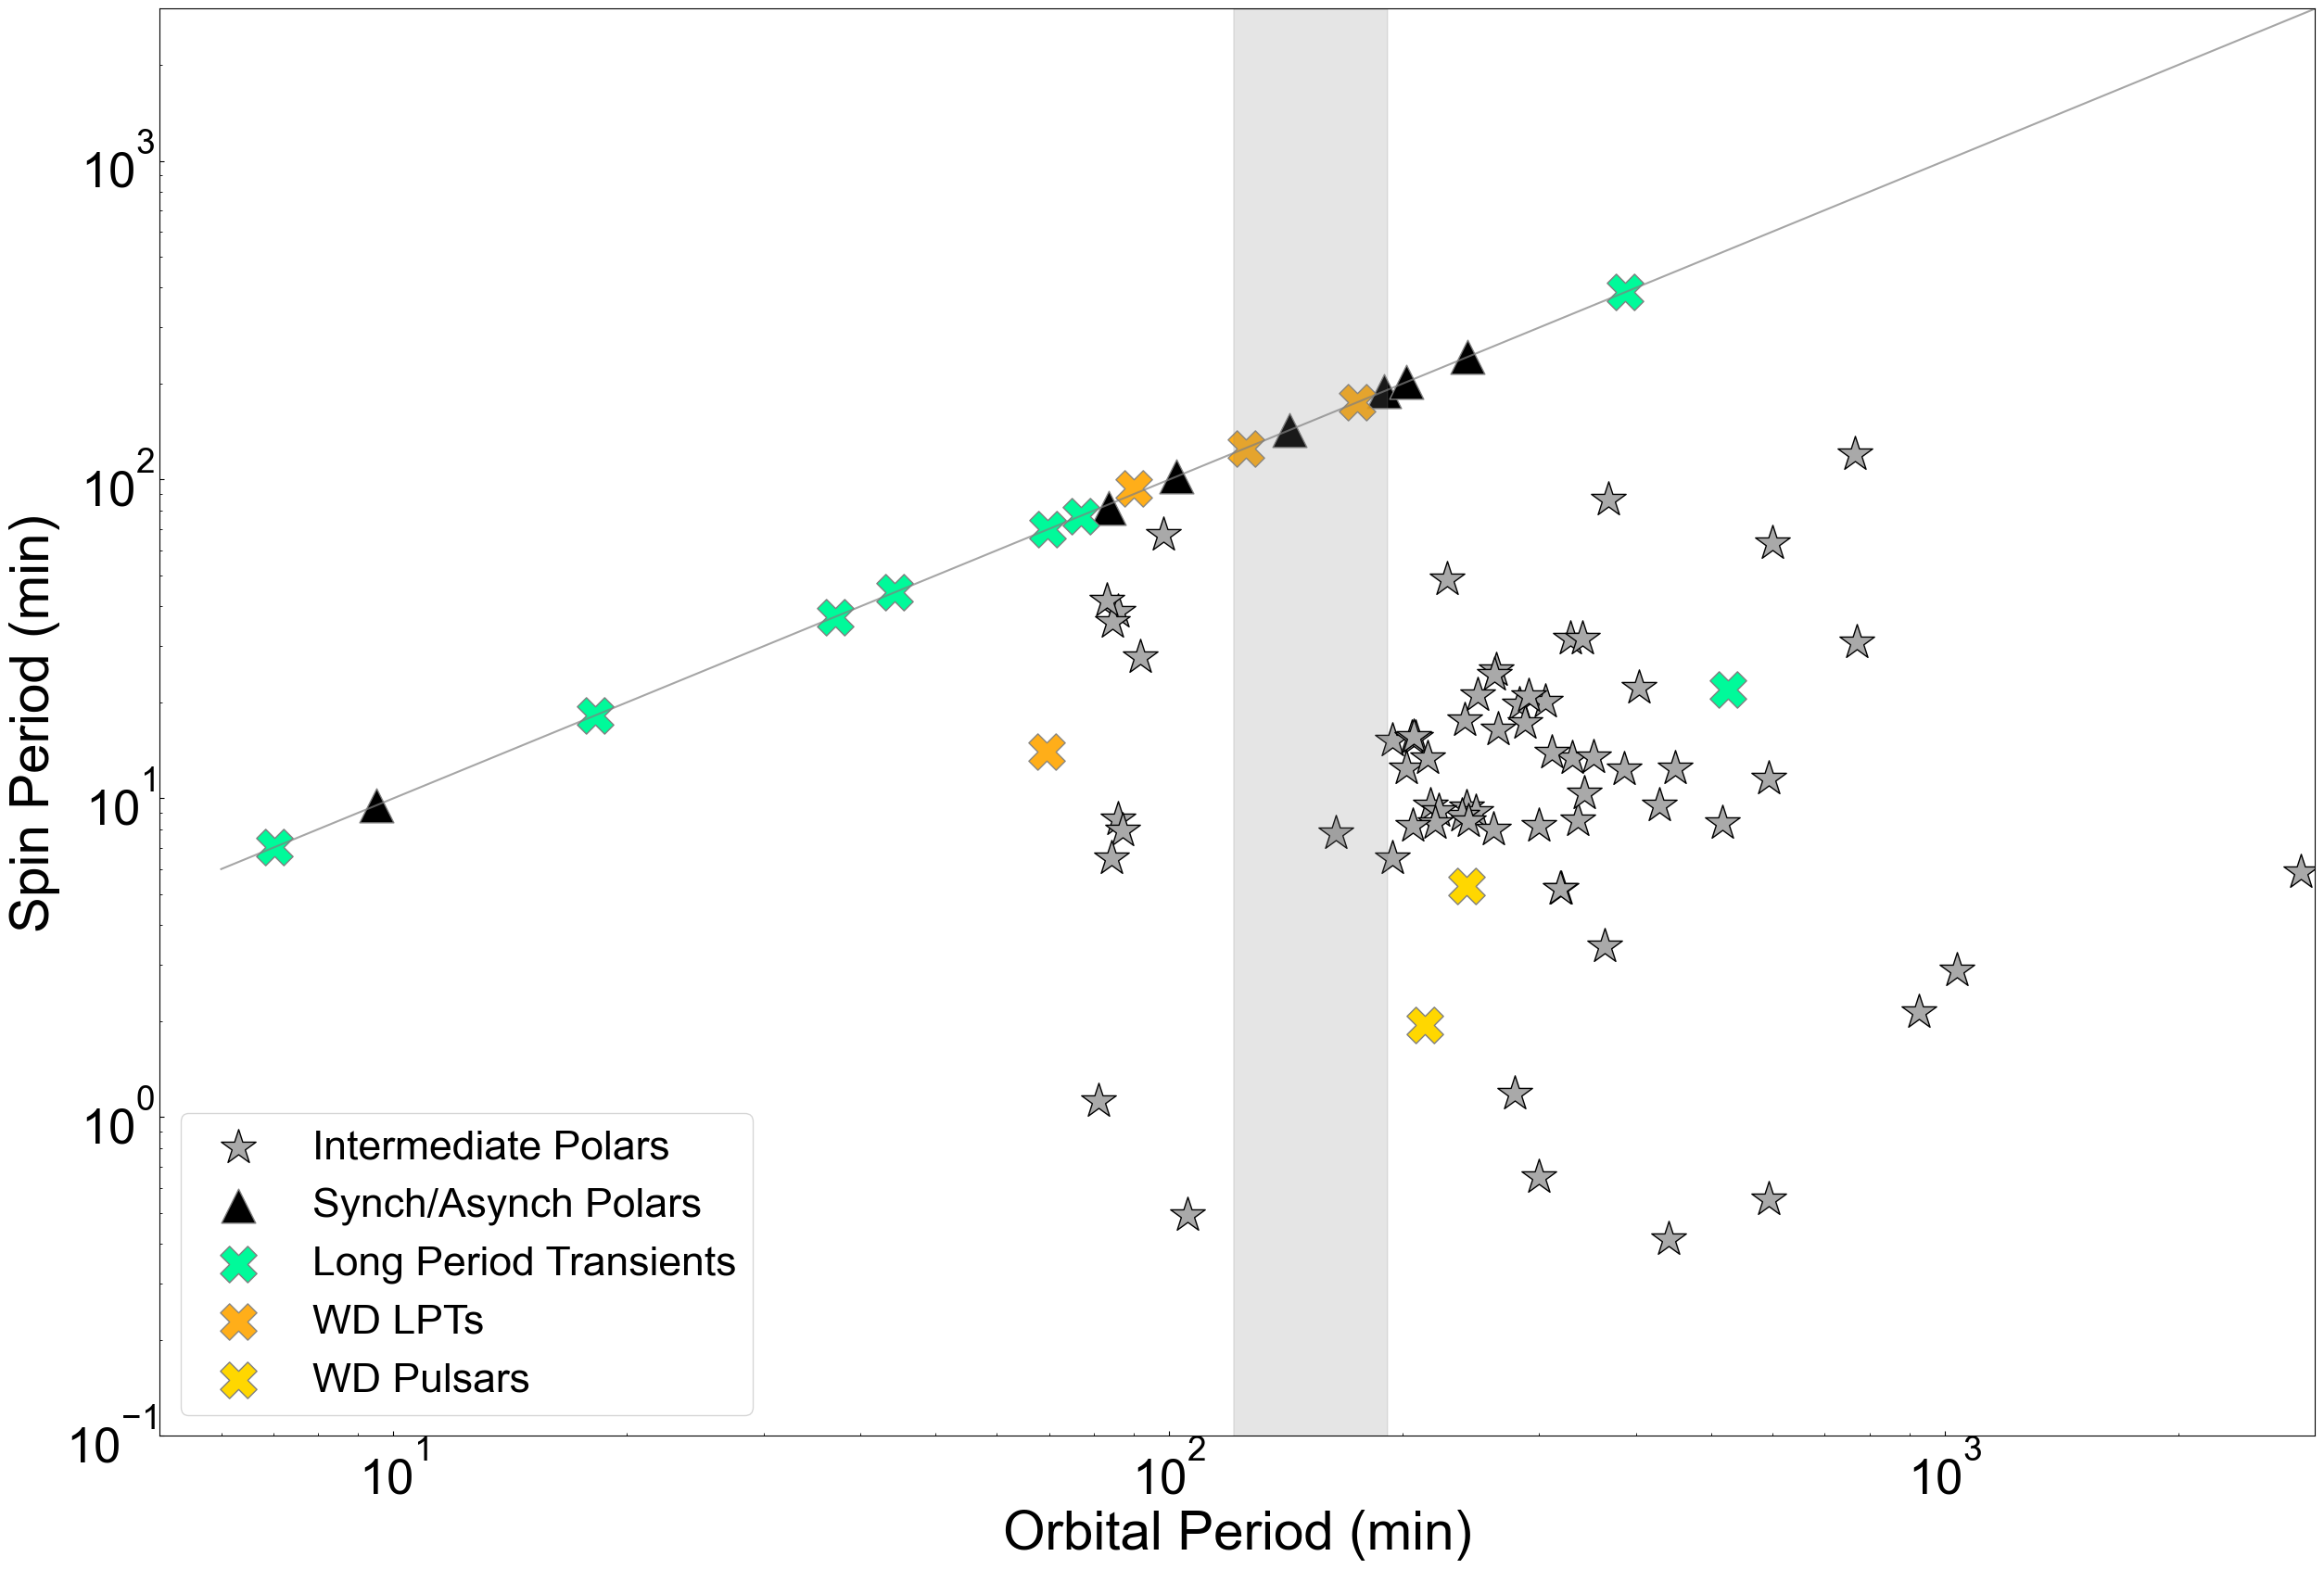

In [5]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (30,20)
#fig, ax = plt.subplots()

size_points = 200
size_inside_text = 32
alpha_points = 0.9


#plt.rcParams['figure.figsize'] = (12, 18)
plt.rcParams['font.size'] = 30
#plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 38
plt.rcParams['ytick.labelsize'] = 38
#plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 32

from adjustText import adjust_text


#-------- Intermidiate Polar 
selection = ((df_sources_data['Spin_known(s)']/60) / (df_sources_data['Orb_known(hr)']*60) < 0.8999)
plt.scatter(x=df_sources_data[selection]['Orb_known(hr)']*60, 
            y=df_sources_data[selection]['Spin_known(s)']/60, 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
            #norm=my_norm,
            color='darkgrey',
            alpha=1, 
            marker='*',
            edgecolors='black',
            s=800,
            label='Intermediate Polars')


#-------- Polars and aynchronous polar
selection = ((df_sources_data['Spin_known(s)']/60) / (df_sources_data['Orb_known(hr)']*60) > 0.9)
plt.scatter(x=df_sources_data[selection]['Orb_known(hr)']*60, 
            y=df_sources_data[selection]['Spin_known(s)']/60, 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
            #norm=my_norm,
            color='black',
            alpha=1, 
            marker='^',
            edgecolors='gray',
            s=700,
            label='Synch/Asynch Polars')



##-------- LPTs
selection = ((df_radio_sources['type']=='LPT') & (df_radio_sources['name']!='GPMJ1839-10'))
plt.scatter(x=df_radio_sources[selection]['period(s)']/60, 
            y=df_radio_sources[selection]['period(s)']/60, 
            color='mediumspringgreen',
            alpha=1, 
            marker='X',
            s=800,
            edgecolors='gray',
            label='Long Period Transients')

 

##-------- LPT GMP J1839-10
selection = ((df_radio_sources['name']=='GPMJ1839-10'))
plt.scatter(x=df_radio_sources[selection]['orbit(s)']/60, 
            y=df_radio_sources[selection]['period(s)']/60, 
            color='mediumspringgreen',
            alpha=1, 
            marker='X',
            edgecolors='gray',
            s=800)

 


##-------- WDLPTs

selection = (df_radio_sources['type']=='WDLPT') 
plt.scatter(x=df_radio_sources[selection]['orbit(s)']/60, 
            y=df_radio_sources[selection]['period(s)']/60, 
            color='orange',
            alpha=0.9, 
            marker='X',
            edgecolors='gray',
            s=800,
            label='WD LPTs')


##-------- WD Pulsars

selection = (df_radio_sources['type']=='WDpulsar') 
plt.scatter(x=df_radio_sources[selection]['orbit(s)']/60, 
            y=df_radio_sources[selection]['period(s)']/60, 
            color='gold',
            alpha=1, 
            marker='X',
            edgecolors='gray',
            s=800,
            label='WD Pulsars')



plt.xlabel(r'Orbital Period (min)', size=42)
plt.ylabel(r'Spin Period (min)', size=42)


plt.yscale('log')
plt.xscale('log')


plt.xlim(5, 3000)
plt.ylim(0.1, 3000)



# Create the legend by default
plt.legend(fontsize=32, loc='lower left')
ax = plt.gca()
leg = ax.get_legend()
#leg.legendHandles[0].set_color('grey')
leg.legendHandles[0]
leg.legendHandles[1]
leg.legendHandles[2]
leg.legendHandles[3]
leg.legendHandles[4]


#plot a linear function

x = np.linspace(6,4000,3500)
y=x
plt.plot(x,y, 'grey', alpha=0.7)

# Plot period-Gap
y = np.linspace(0.1,3000,3500)
plt.fill_betweenx(y,x1=121,x2=191,color='gray', alpha=0.2)



plt.savefig('Figure8_WD_periods.png')
plt.savefig('Figure8_WD_periods.pdf',format= 'pdf', bbox_inches="tight")